# Divvy Bike Share Study Case

Author: Victor Hurtado

## Description

The purpose of this notebook is to study the difference between members and casual types of user using the Divvy bike share service.

Motivate International Inc. (“Motivate”) operates the City of Chicago’s (“City”) Divvy bicycle sharing service. The City permits Motivate to make certain Divvy system data owned by the City (“Data”) available to the public.

The Data has been made available by Motivate International Inc. under this [license](https://www.divvybikes.com/data-license-agreement). And, it can be found [here](https://divvy-tripdata.s3.amazonaws.com/index.html).

The Data contain the type of bicycle used, information about the departure and arrival stations (id, name, latitude and longitude), date and time the trip started and ended, the type of membership used, as well as an unique id assigned to the use of the service.

It should be noted that the Data does not allow differentiating the repetitive use of the services by a certain user or group of users. This is due to the data distribution policy.

## Setting up the environment

In [1]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import timedelta

## 1. Import Data

With the purpose of simplify the exploration of the data, every dataframe will be added a new column ('file_name').

In [2]:
df_202010 = pd.read_csv('../data/202010-divvy-tripdata.csv')
df_202010['file_name'] = '2020_10'
#df_202010.head()

In [3]:
df_202011 = pd.read_csv('../data/202011-divvy-tripdata.csv')
df_202011['file_name'] = '2020_11'
#df_202011.head()

In [4]:
df_202012 = pd.read_csv('../data/202012-divvy-tripdata.csv')
df_202012['file_name'] = '2020_12'
#df_202012.head()

In [5]:
df_202101 = pd.read_csv('../data/202101-divvy-tripdata.csv')
df_202101['file_name'] = '2021_01'
#df_202101.head()

In [6]:
df_202102 = pd.read_csv('../data/202102-divvy-tripdata.csv')
df_202102['file_name'] = '2021_02'
#df_202102.head()

In [7]:
df_202103 = pd.read_csv('../data/202103-divvy-tripdata.csv')
df_202103['file_name'] = '2021_03'
#df_202103.head()

In [8]:
df_202104 = pd.read_csv('../data/202104-divvy-tripdata.csv')
df_202104['file_name'] = '2021_04'
#df_202104.head()

In [9]:
df_202105 = pd.read_csv('../data/202105-divvy-tripdata.csv')
df_202105['file_name'] = '2021_05'
#df_202105.head()

In [10]:
df_202106 = pd.read_csv('../data/202106-divvy-tripdata.csv')
df_202106['file_name'] = '2021_06'
#df_202106.head()

In [11]:
df_202107 = pd.read_csv('../data/202107-divvy-tripdata.csv')
df_202107['file_name'] = '2021_07'
#df_202107.head()

In [12]:
df_202108 = pd.read_csv('../data/202108-divvy-tripdata.csv')
df_202108['file_name'] = '2021_08'
#df_202108.head()

In [13]:
df_202109 = pd.read_csv('../data/202109-divvy-tripdata.csv')
df_202109['file_name'] = '2021_09'
#df_202109.head()

## 2. Explore

### 2.1 Columns Type

In [14]:
# Takes a number of dataframes, and return another dataframe whose number of rows correspond to the length 
# of the input, and the number of columns is the same as the input dataframes
# Note: The input dataframes must have a file_name column, and the same number of column.
def columns_type_report(*dataframes):
    result = []
    names = []
    
    for df in dataframes:
        result.append(df.dtypes)
        names.append(df['file_name'][0])
            
    return pd.DataFrame(result, index=names)

In [15]:
columns_type_report(df_202010, df_202011, df_202012, df_202101, df_202102, df_202103,
                    df_202104, df_202105, df_202106, df_202107, df_202108, df_202109)

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,file_name
2020_10,object,object,object,object,object,float64,object,float64,float64,float64,float64,float64,object,object
2020_11,object,object,object,object,object,float64,object,float64,float64,float64,float64,float64,object,object
2020_12,object,object,object,object,object,object,object,object,float64,float64,float64,float64,object,object
2021_01,object,object,object,object,object,object,object,object,float64,float64,float64,float64,object,object
2021_02,object,object,object,object,object,object,object,object,float64,float64,float64,float64,object,object
2021_03,object,object,object,object,object,object,object,object,float64,float64,float64,float64,object,object
2021_04,object,object,object,object,object,object,object,object,float64,float64,float64,float64,object,object
2021_05,object,object,object,object,object,object,object,object,float64,float64,float64,float64,object,object
2021_06,object,object,object,object,object,object,object,object,float64,float64,float64,float64,object,object
2021_07,object,object,object,object,object,object,object,object,float64,float64,float64,float64,object,object


* started_at and ended_at columns are object type.
* Is also worth notice that the first two rows (2020_10 and 2020_11) have a numeric column type in the start and end station id, but the rest are object type.

### 2.2 Number of Observations

In [16]:
def number_of_obs_report(*dataframes):
    result = []
    names = []
    
    for df in dataframes:
        shape = df.shape
        result.append([shape[0], shape[1]])
        names.append(df['file_name'][0])
            
    return pd.DataFrame(result, index=names, columns=['Rows', 'Columns'])

In [17]:
number_of_obs_report(df_202010, df_202011, df_202012, df_202101, df_202102, df_202103,
                     df_202104, df_202105, df_202106, df_202107, df_202108, df_202109)

,Rows,Columns
2020_10,388653,14
2020_11,259716,14
2020_12,131573,14
2021_01,96834,14
2021_02,49622,14
2021_03,228496,14
2021_04,337230,14
2021_05,531633,14
2021_06,729595,14
2021_07,822410,14


### 2.3 Unique Values

In [18]:
# Not all columns have useful information about the range of values within them. So, the function subset
# the number of columns in each input dataframe, and return a new dataframe with only those of columns.
def unique_values_report(*dataframes):
    results = []
    names = []
    
    # Column Subset
    columns = [0, 1, 4, 5, 6, 7, 12]  
    for df in dataframes:
        results.append(df.nunique().values[columns])
        names.append(df['file_name'][0])
        
    return pd.DataFrame(results, index=names, columns=dataframes[0].columns[columns])

In [19]:
unique_values_report(df_202010, df_202011, df_202012, df_202101, df_202102, df_202103,
                     df_202104, df_202105, df_202106, df_202107, df_202108, df_202109)

,ride_id,rideable_type,start_station_name,start_station_id,end_station_name,end_station_id,member_casual
2020_10,388653,2,669,664,669,664,2
2020_11,259716,2,665,661,657,656,2
2020_12,131573,3,644,642,643,641,2
2021_01,96834,3,640,638,632,629,2
2021_02,49622,3,582,582,584,584,2
2021_03,228496,3,673,673,673,673,2
2021_04,337230,3,681,681,681,681,2
2021_05,531633,3,687,686,683,682,2
2021_06,729595,3,689,689,690,690,2
2021_07,822410,3,717,710,714,707,2


* The number of unique values in the ride_id column is the same as the number of observation in their dataframe.
* Some rows show unmatch number of observations between the name and id in the start or end station, or both.

### 2.4 Check for Null Values

In [20]:
def null_values_report(*dataframes):
    report = []
    names = []
    
    for df in dataframes:
        count_null = df.isnull().sum()
        names.append(df['file_name'][0])
        
        report.append(list(count_null.values)[:-1])  # [:-1] -> Exclude the last value (file_name)
            
    return pd.DataFrame(report, index=names, columns=dataframes[0].columns[:-1])

In [21]:
null_values_report(df_202010, df_202011, df_202012, df_202101, df_202102, df_202103,
                   df_202104, df_202105, df_202106, df_202107, df_202108, df_202109)

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
2020_10,0,0,0,0,31198,31405,35631,35787,0,0,474,474,0
2020_11,0,0,0,0,24324,24434,26749,26826,0,0,284,284,0
2020_12,0,0,0,0,11699,11699,13237,13237,0,0,111,111,0
2021_01,0,0,0,0,8625,8625,10277,10277,0,0,103,103,0
2021_02,0,0,0,0,4046,4046,5358,5358,0,0,214,214,0
2021_03,0,0,0,0,14848,14848,16727,16727,0,0,167,167,0
2021_04,0,0,0,0,26056,26056,28174,28174,0,0,267,267,0
2021_05,0,0,0,0,53744,53744,58194,58194,0,0,452,452,0
2021_06,0,0,0,0,80093,80093,86387,86387,0,0,717,717,0
2021_07,0,0,0,0,87263,87262,93158,93158,0,0,731,731,0


### 2.5 Check for duplicates values

In [22]:
def check_duplicates_report(*dataframes):
    result = []
    names = []
    
    for df in dataframes:
        names.append(df['file_name'][0])      
        result.append(df.duplicated(subset='ride_id').any())

    return pd.Series(result, index=names, name=dataframes[0].columns[0])

In [23]:
check_duplicates_report(df_202010, df_202011, df_202012, df_202101, df_202102, df_202103,
                        df_202104, df_202105, df_202106, df_202107, df_202108, df_202109)

2020_10    False
2020_11    False
2020_12    False
2021_01    False
2021_02    False
2021_03    False
2021_04    False
2021_05    False
2021_06    False
2021_07    False
2021_08    False
2021_09    False
Name: ride_id, dtype: bool

## 3. Prepare Data for Analysis

### 3.1 Combine Datasets

In [24]:
df = pd.concat([df_202010, df_202011, df_202012, df_202101, df_202102, df_202103, 
                df_202104, df_202105, df_202106, df_202107, df_202108, df_202109], 
                ignore_index=True)

#print("Rows: {}\nColumns: {}".format(df.shape[0], df.shape[1]))
#df.head()

### 3.2 Change Columns data type

In [25]:
df = df.astype({'started_at': 'datetime64[ns]', 'ended_at': 'datetime64[ns]'})
#df.dtypes

#### 3.2.1 Remove observation where the end trip time is less than the start time

In [26]:
df = df[df['started_at'] < df['ended_at']]

### 3.3 Check for Duplicates in ride_id Column

In [27]:
df.duplicated(subset='ride_id').any()

False

### 3.4 Compute Trip length

In [28]:
df['trip_length'] = df['ended_at'] - df['started_at']

#### 3.4.1 Summary

In [29]:
df['trip_length'].describe()

count                      5132499
mean     0 days 00:22:44.731441545
std      0 days 02:58:16.942923873
min                0 days 00:00:01
25%                0 days 00:07:06
50%                0 days 00:12:36
75%                0 days 00:22:49
max               38 days 20:24:09
Name: trip_length, dtype: object

#### 3.4.2 Remove Outliers

In [30]:
# Convert trip_length time from timedelta to seconds, and compute Z-score
z_score = stats.zscore(df['trip_length'].dt.total_seconds())

# Summary of every z-score equal or greater than 3
df[z_score >= 3]['trip_length'].describe()

count                         7889
mean     1 days 10:24:44.672201799
std      2 days 18:50:03.888877160
min                0 days 09:17:45
25%                0 days 14:07:05
50%                0 days 21:54:42
75%                1 days 00:59:54
max               38 days 20:24:09
Name: trip_length, dtype: object

In [31]:
# Remove trip_length values greater than 9 hours and 17 minutes
df = df[df['trip_length'] < timedelta(hours=9, minutes=17)]

# Remove trip_length values less than 1 minute (they are considered 'false start')
df = df[df['trip_length'] > timedelta(minutes=1)]

### 3.5 Remove null values

In [32]:
# Remove observations from stations that not have name and id
df.dropna(subset=['start_station_name', 'start_station_id'], how='all', inplace=True)

df.dropna(subset=['end_station_name', 'end_station_id'], how='all', inplace=True)

# Check number of null values
df.isnull().sum()

ride_id                 0
rideable_type           0
started_at              0
ended_at                0
start_station_name      1
start_station_id      242
end_station_name        0
end_station_id        177
start_lat               0
start_lng               0
end_lat                 0
end_lng                 0
member_casual           0
file_name               0
trip_length             0
dtype: int64

**Note**: Null values of start and end station id will be omitted because the column will be dropped.

#### 3.5.1 Fill the start station missing name value

In [33]:
# Get the observation (row)
df[df['start_station_name'].isnull()]

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,file_name,trip_length
4448115,DE82A15026BA3056,electric_bike,2021-09-21 18:18:59,2021-09-21 18:21:48,NaN,20215,Hegewisch Metra Station,20215,41.6485,-87.546089,41.648589,-87.54625,casual,2021_09,0 days 00:02:49


In [34]:
# Since the start and end station have the same id, we can use the value of the end station.
record = df[df['start_station_name'].isnull()]
station_name = record['end_station_name'].values[0]

# Assign value to start station
df.loc[4448115, 'start_station_name'] = station_name

# Check value by ride_id
df[df['ride_id'] == 'DE82A15026BA3056']

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,file_name,trip_length
4448115,DE82A15026BA3056,electric_bike,2021-09-21 18:18:59,2021-09-21 18:21:48,Hegewisch Metra Station,20215,Hegewisch Metra Station,20215,41.6485,-87.546089,41.648589,-87.54625,casual,2021_09,0 days 00:02:49


### 3.6 Compute Month and Weekday

In [35]:
df['month'] = df['started_at'].dt.month

# Set weekday as a categorical variable
df['weekday'] = pd.Categorical(df['started_at'].dt.day_name(), 
                               categories = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'],
                               ordered=True)

### 3.7 Remove Columns

In [36]:
df.drop(columns=['started_at',
                 'ended_at',
                 'start_station_id',
                 'end_station_id',
                 'start_lat',
                 'start_lng',
                 'end_lat',
                 'end_lng',
                 'file_name'],
       inplace=True)

df.head()

,ride_id,rideable_type,start_station_name,end_station_name,member_casual,trip_length,month,weekday
0,ACB6B40CF5B9044C,electric_bike,Lakeview Ave & Fullerton Pkwy,Rush St & Hubbard St,casual,0 days 00:17:29,10,Saturday
1,DF450C72FD109C01,electric_bike,Southport Ave & Waveland Ave,Kedzie Ave & Milwaukee Ave,casual,0 days 00:14:08,10,Saturday
2,B6396B54A15AC0DF,electric_bike,Stony Island Ave & 67th St,University Ave & 57th St,casual,0 days 00:08:21,10,Saturday
3,44A4AEE261B9E854,electric_bike,Clark St & Grace St,Broadway & Sheridan Rd,casual,0 days 00:02:52,10,Saturday
4,10B7DD76A6A2EB95,electric_bike,Southport Ave & Wrightwood Ave,Stave St & Armitage Ave,casual,0 days 00:16:13,10,Saturday


### 3.8 Rename Columns

In [37]:
df.rename(columns={'member_casual': 'membership_type',
                   'rideable_type': 'bike_type',
                   'start_station_name': 'start_station',
                   'end_station_name': 'end_station'},
         inplace=True)

## 4. Analyse Data

### 4.1 Use of the service by membership type between octuber 2020 and september 2021

In [38]:
temp = df.groupby('membership_type').agg({'ride_id': pd.Series.nunique, 
                                          'weekday': pd.Series.mode, 
                                          'bike_type':pd.Series.mode,
                                          'trip_length': pd.Series.mean})

temp.rename(columns={'ride_id': 'count',
                     'weekday': 'mode_weekday',
                     'bike_type': 'mode_bike_type',
                     'trip_length': 'mean_trip_length'})

,count,mode_weekday,mode_bike_type,mean_trip_length
membership_type,,,,
casual,1939201,Saturday,classic_bike,0 days 00:27:50.759131724
member,2350846,Wednesday,classic_bike,0 days 00:13:42.232457166


#### 4.1.1 Percentage

In [39]:
# Percentage of use
df['membership_type'].value_counts(normalize=True)

member    0.547977
casual    0.452023
Name: membership_type, dtype: float64

### 4.2 Weekdays service use by membership type

In [40]:
temp = df.groupby(['membership_type', 'weekday']).agg({'ride_id': pd.Series.nunique, 
                                                       'bike_type':pd.Series.mode,
                                                       'trip_length': pd.Series.mean})

# Is made inplace, because the dataframe will be used for plotting
temp.rename(columns={'ride_id': 'count',
                     'bike_type': 'mode_bike_type',
                     'trip_length': 'mean_trip_length'},
           inplace=True)

# Display the dataframe
temp

count mode_bike_type          mean_trip_length
membership_type weekday                                                   
casual          Monday     216312   classic_bike 0 days 00:28:14.630080624
                Tuesday    200949   classic_bike 0 days 00:25:19.245276164
                Wednesday  206058   classic_bike 0 days 00:24:18.488503236
                Thursday   219854   classic_bike 0 days 00:23:45.367193683
                Friday     275174   classic_bike 0 days 00:25:47.826571551
                Saturday   443908   classic_bike 0 days 00:30:11.868022202
                Sunday     376946   classic_bike 0 days 00:32:00.561289946
member          Monday     319123   classic_bike 0 days 00:13:11.790162413
                Tuesday    346408   classic_bike 0 days 00:12:54.802322694
                Wednesday  360988   classic_bike 0 days 00:12:58.527128325
                Thursday   356902   classic_bike 0 days 00:12:52.558534275
                Friday     340651   classic_bike 0 days 00:13:21.726250620
                Saturday   336250   classic_bike 0 days 00:15:19.096844609
                Sunday     290524   classic_bike 0 days 00:15:39.488331428

#### 4.2.1 Graph

In [41]:
# Compute the mean trip length in minutes
temp['mean_trip_length_in_minutes'] = temp['mean_trip_length'].dt.total_seconds() / 60

# Reset index, to avoid working with multi-level index
temp.reset_index(inplace=True)

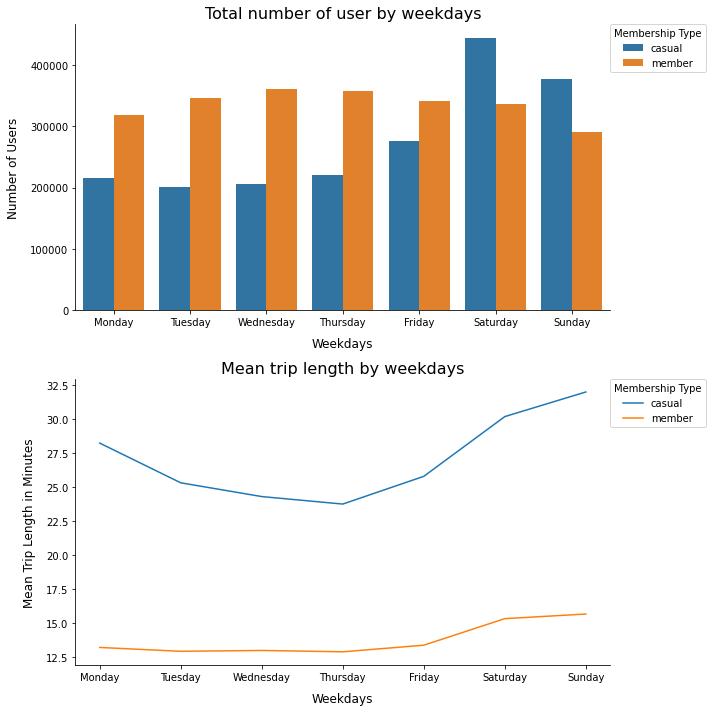

In [42]:

plt.figure(figsize=(10, 10), tight_layout=True)

# First Subplot
plt.subplot(2, 1, 1)
sns.barplot(data=temp, x='weekday', y='count', hue='membership_type')
plt.gca().set_title('Total number of user by weekdays', fontsize=16)
plt.gca().set_xlabel('Weekdays', fontsize=12, labelpad=10)
plt.gca().set_ylabel('Number of Users', fontsize=12, labelpad=10)

# set legend name and place it outside top right corner of plot
plt.legend(bbox_to_anchor=(1, 1), loc='upper left', borderaxespad=0, title='Membership Type')

# Second Subplot
plt.subplot(2, 1, 2)
sns.lineplot(data=temp, x='weekday', y='mean_trip_length_in_minutes', hue='membership_type')
plt.gca().set_title('Mean trip length by weekdays', fontsize=16)
plt.gca().set_xlabel('Weekdays', fontsize=12, labelpad=10)
plt.gca().set_ylabel('Mean Trip Length in Minutes', fontsize=12, labelpad=10)

# set legend name and place it outside top right corner of plot
plt.legend(bbox_to_anchor=(1, 1), loc='upper left', borderaxespad=0, title='Membership Type')

# Separation between subplots
plt.gcf().subplots_adjust(hspace=20)

# remove the frame of the chart
sns.despine()

### 4.3 Bike type use by membership type

In [43]:
temp = df.groupby(['membership_type', 'bike_type']).agg({'ride_id': pd.Series.nunique, 
                                                         'trip_length': pd.Series.mean})

temp.rename(columns={'ride_id': 'count', 'trip_length': 'mean_trip_length'},
                    inplace=True)

temp

count          mean_trip_length
membership_type bike_type                                       
casual          classic_bike   1102987 0 days 00:25:37.040989603
                docked_bike     400606 0 days 00:41:23.182603355
                electric_bike   435608 0 days 00:21:02.198350351
member          classic_bike   1602808 0 days 00:13:55.366403212
                docked_bike     262986 0 days 00:13:59.739792232
                electric_bike   485052 0 days 00:12:49.340441849

In [44]:
# Compute the mean trip length in minutes
temp['mean_trip_length_in_minutes'] = temp['mean_trip_length'].dt.total_seconds() / 60

# Reset index, to avoid working with multi-level index
temp.reset_index(inplace=True)

#### 4.3.1 Graph

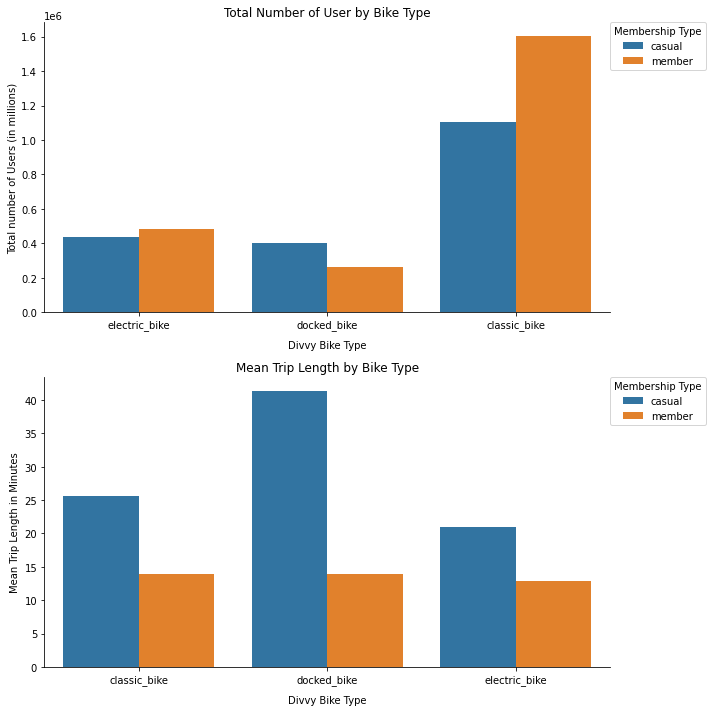

In [45]:
plt.figure(figsize=(10, 10), tight_layout=True)

# First Subplot
plt.subplot(2, 1, 1)
sns.countplot(data=df, x='bike_type', hue='membership_type')

plt.gca().set_title('Total Number of User by Bike Type')
plt.gca().set_xlabel('Divvy Bike Type', labelpad=10)
plt.gca().set_ylabel('Total number of Users (in millions)')

# set legend name and place it outside top right corner of plot
plt.legend(bbox_to_anchor=(1, 1), loc='upper left', borderaxespad=0, title='Membership Type')

# remove the frame of the chart
sns.despine()

# Second Subplot
plt.subplot(2, 1, 2)
sns.barplot(data=temp, x='bike_type', y='mean_trip_length_in_minutes', hue='membership_type')

plt.gca().set_title('Mean Trip Length by Bike Type')
plt.gca().set_xlabel('Divvy Bike Type', labelpad=10)
plt.gca().set_ylabel('Mean Trip Length in Minutes')

# set legend name and place it outside top right corner of plot
plt.legend(bbox_to_anchor=(1, 1), loc='upper left', borderaxespad=0, title='Membership Type')

# remove the frame of the chart
sns.despine()

### 4.4 Monthly service use by membership type

In [46]:
temp = df.groupby(['membership_type', 'month']).agg({'ride_id': pd.Series.nunique,
                                                     'trip_length': pd.Series.mean}).reset_index()

temp['mean_triṕ_length_in_seconds'] = temp['trip_length'].dt.total_seconds()

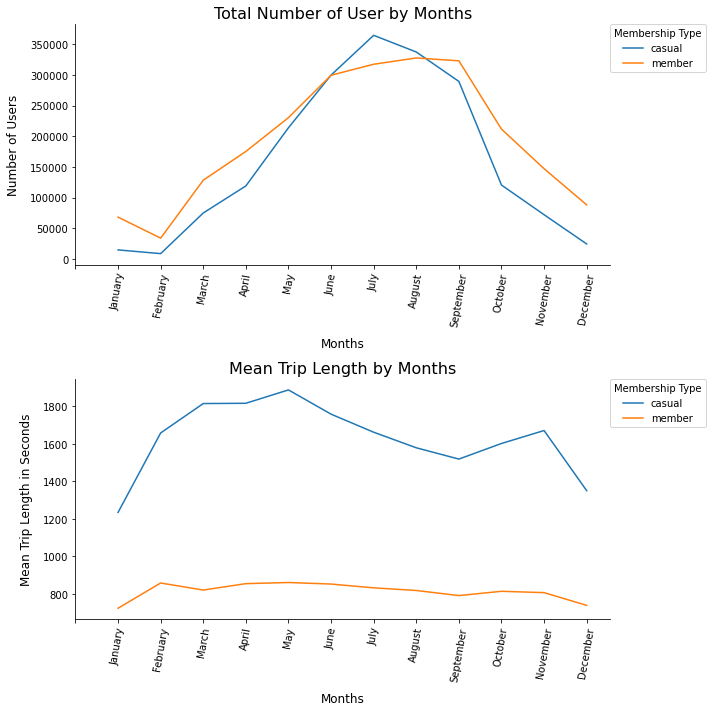

In [47]:
months = ['', 'January', 'February', 'March', 'April', 'May', 'June', 'July', 
          'August', 'September', 'October', 'November', 'December']

plt.figure(figsize=(10, 10), tight_layout=True)

# First Subplot
plt.subplot(2, 1, 1)
sns.lineplot(data=temp, x='month', y='ride_id', hue='membership_type', estimator=None)
plt.gca().set_title('Total Number of User by Months', fontsize=16)
plt.gca().set_xlabel('Months', fontsize=12, labelpad=10)
plt.gca().set_ylabel('Number of Users', fontsize=12, labelpad=10)

# Set x tick labels
plt.gca().set_xticks(range(0, 13))
plt.gca().set_xticklabels(labels=months)
plt.xticks(rotation=80)

# set legend name and place it outside top right corner of plot
plt.legend(bbox_to_anchor=(1, 1), loc='upper left', borderaxespad=0, title='Membership Type')

# Second Subplot
plt.subplot(2, 1, 2)
sns.lineplot(data=temp, x='month', y='mean_triṕ_length_in_seconds', hue='membership_type')
plt.gca().set_title('Mean Trip Length by Months', fontsize=16)
plt.gca().set_xlabel('Months', fontsize=12, labelpad=10)
plt.gca().set_ylabel('Mean Trip Length in Seconds', fontsize=12, labelpad=10)

# Set x tick labels
plt.gca().set_xticks(range(0, 13))
plt.gca().set_xticklabels(labels=months, rotation=80)

# set legend name and place it outside top right corner of plot
plt.legend(bbox_to_anchor=(1, 1), loc='upper left', borderaxespad=0, title='Membership Type')

# Separation between subplots
plt.gcf().subplots_adjust(hspace=20)

# remove the top and right frame of the chart
sns.despine()

### 4.5 Top 10 most frequent routes by membership type

In [48]:
# Create an empty dataframe
most_frequent_routes = pd.DataFrame(columns=['membership_type', 'start_station', 'end_station', 'ride_id'])

# Subset the dataframe
temp = df[['ride_id', 'membership_type', 'start_station', 'end_station']]

for group, frame in temp.groupby('membership_type'):
    
    df_temp = frame.groupby(['start_station', 'end_station']).agg({'ride_id': pd.Series.nunique})
    df_temp = df_temp.nlargest(10, columns='ride_id').reset_index()
    df_temp['membership_type'] = group
    
    most_frequent_routes = pd.concat([most_frequent_routes, df_temp], ignore_index=True)

most_frequent_routes.rename(columns={'ride_id': 'count'}, inplace=True)
most_frequent_routes.set_index(['membership_type', 'start_station', 'end_station'])

count
membership_type start_station              end_station                      
casual          Streeter Dr & Grand Ave    Streeter Dr & Grand Ave     10559
                Millennium Park            Millennium Park              5815
                Michigan Ave & Oak St      Michigan Ave & Oak St        5569
                Lake Shore Dr & Monroe St  Lake Shore Dr & Monroe St    5534
                Buckingham Fountain        Buckingham Fountain          3507
                Theater on the Lake        Theater on the Lake          3084
                Lake Shore Dr & Monroe St  Streeter Dr & Grand Ave      3050
                Streeter Dr & Grand Ave    Millennium Park              2957
                Indiana Ave & Roosevelt Rd Indiana Ave & Roosevelt Rd   2931
                Montrose Harbor            Montrose Harbor              2838
member          Ellis Ave & 60th St        Ellis Ave & 55th St          2769
                Ellis Ave & 55th St        Ellis Ave & 60th St          2471
                State St & 33rd St         Calumet Ave & 33rd St        1440
                MLK Jr Dr & 29th St        State St & 33rd St           1400
                Calumet Ave & 33rd St      State St & 33rd St           1340
                Loomis St & Lexington St   Morgan St & Polk St          1335
                State St & 33rd St         MLK Jr Dr & 29th St          1293
                Morgan St & Polk St        Loomis St & Lexington St     1214
                Loomis St & Lexington St   Halsted St & Polk St         1179
                Ellis Ave & 60th St        University Ave & 57th St     1137

## 5. Summary

* The service was more use by members (55%) than by casual users (45%).
* The classic bikes type is the most popular type among users.
* The casual users spend more time on average than members. 
* The most active days for casual users are the weekends, and the members use the service more on the middle of the week.
* The service is more use in spring and summer months, and less use in winter and autumn.